In [6]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium==0.5.0 # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

!pip install beautifulsoup4
print('Libraries imported.')

     |████████████████████████████████| 81kB 6.6MB/s eta 0:00:011
  Stored in directory: /home/dsxuser/.cache/pip/wheels/f8/98/ff/954791afc47740d554f0d9e5885fa09dd60c2265d42578e665
Successfully built folium
Libraries imported.


## use the get method to get an HTML file from the webpage

In [7]:
from requests import get
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
response=get(url)

In [8]:
print(response.text[:100])


<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<titl


## use the beautiful soup function to parse the html file and create a python object

In [9]:
from bs4 import BeautifulSoup
soup=BeautifulSoup(response.text,'html.parser')
type(soup)

bs4.BeautifulSoup

## identify the table in the html file and create a list of all the contents of the table

In [10]:
pintable=soup.find("table",attrs={"class":"wikitable sortable"})
pintabledata=pintable.tbody.find_all("td")
pintabledata[1]

<td>Not assigned
</td>

## loop through the list and clean up extra keywords and texts and create a master list

In [11]:
data=[]
for i, value in enumerate(pintabledata):
    value=value.text
    value=value.replace('\n','')
    data.append(value)
n=len(data)
n

540

## iterate through the master list and segment the data into right lists i.e. Postalcodes, buroughs and neighborhoods

In [12]:
i=0
pin=[]
while i<n:
    pin.append(data[i])
    i=i+3

j=1
burough=[]
while j<n:
    burough.append(data[j])
    j=j+3

k=2
neigh=[]
while k<n:
    neigh.append(data[k])
    k=k+3

print(pin, burough, neigh)


['M1A', 'M2A', 'M3A', 'M4A', 'M5A', 'M6A', 'M7A', 'M8A', 'M9A', 'M1B', 'M2B', 'M3B', 'M4B', 'M5B', 'M6B', 'M7B', 'M8B', 'M9B', 'M1C', 'M2C', 'M3C', 'M4C', 'M5C', 'M6C', 'M7C', 'M8C', 'M9C', 'M1E', 'M2E', 'M3E', 'M4E', 'M5E', 'M6E', 'M7E', 'M8E', 'M9E', 'M1G', 'M2G', 'M3G', 'M4G', 'M5G', 'M6G', 'M7G', 'M8G', 'M9G', 'M1H', 'M2H', 'M3H', 'M4H', 'M5H', 'M6H', 'M7H', 'M8H', 'M9H', 'M1J', 'M2J', 'M3J', 'M4J', 'M5J', 'M6J', 'M7J', 'M8J', 'M9J', 'M1K', 'M2K', 'M3K', 'M4K', 'M5K', 'M6K', 'M7K', 'M8K', 'M9K', 'M1L', 'M2L', 'M3L', 'M4L', 'M5L', 'M6L', 'M7L', 'M8L', 'M9L', 'M1M', 'M2M', 'M3M', 'M4M', 'M5M', 'M6M', 'M7M', 'M8M', 'M9M', 'M1N', 'M2N', 'M3N', 'M4N', 'M5N', 'M6N', 'M7N', 'M8N', 'M9N', 'M1P', 'M2P', 'M3P', 'M4P', 'M5P', 'M6P', 'M7P', 'M8P', 'M9P', 'M1R', 'M2R', 'M3R', 'M4R', 'M5R', 'M6R', 'M7R', 'M8R', 'M9R', 'M1S', 'M2S', 'M3S', 'M4S', 'M5S', 'M6S', 'M7S', 'M8S', 'M9S', 'M1T', 'M2T', 'M3T', 'M4T', 'M5T', 'M6T', 'M7T', 'M8T', 'M9T', 'M1V', 'M2V', 'M3V', 'M4V', 'M5V', 'M6V', 'M7V', 'M8V'

## create a numpy array and put them into the required dataframe

In [13]:
arr=np.array([pin,burough,neigh])

toronto=pd.DataFrame({'PostalCode': arr[0], 'Burough': arr[1], 'Neighborhood': arr[2]})

toronto.head()

,PostalCode,Burough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


## Clean up the data frame as per the required questions

In [14]:
#identify which Buroughs are 'Not assigned' through a loop
i=0
NA=[]
while i < len(toronto['Burough']):
    if toronto.iloc[i,1]=='Not assigned':
        NA.append(i) #create a list of all those indices that have buroughs that are not assigned
        
    else:
        if toronto.iloc[i,2]=='Not assigned':
            toronto.iloc[i,2]=toronto.iloc[i,1] #also replace the Neighborhoods with Buroughs if they are not assigned
    i=i+1
    
toronto.drop(NA, inplace=True) #drop the rows with Not assigned buroughs
toronto.reset_index(drop=True, inplace=True) #reset the index
toronto.head()

,PostalCode,Burough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [15]:
toronto.shape

(103, 3)

## Read table and rename Postal Code to match toronto table

In [16]:
url='http://cocl.us/Geospatial_data'
ll=pd.read_csv(url)
ll.rename(columns={'Postal Code': "PostalCode"}, inplace=True)

## Use the python pandas version of vlookup

In [17]:
toronto = pd.merge(toronto,ll, on ='PostalCode', how ='left') 

toronto.head()

,PostalCode,Burough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [18]:
CLIENT_ID = 'MZBA1CNXXF0DDQIC4KHMOQDXVZGVENWAOXO5EINRHWOF1C0G' # your Foursquare ID
CLIENT_SECRET = 'LSHTOXH4P5PJMGKK5LGCIYQ0ANZXCLC2ZU03TD2RAEKX2VTZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius



# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'
url1 = url.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    toronto.iloc[0,3], 
    toronto.iloc[0,4], 
    radius, 
    LIMIT)

url # display URL
#results = requests.get(url).json() = to get url files
#results["response"]["totalResults"] = for number of results
#results["response"]["groups"][0]["items"][<result number>]["venue"]["name"] = for name of the venue
#results["response"]["groups"][0]["items"][<result number>]["venue"]["categories"][0]["name"] = for type of venue

'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'

## create a list of all urls

In [19]:
urls=[]
i=0
while i<103:
    CLIENT_ID = 'MZBA1CNXXF0DDQIC4KHMOQDXVZGVENWAOXO5EINRHWOF1C0G' # your Foursquare ID
    CLIENT_SECRET = 'LSHTOXH4P5PJMGKK5LGCIYQ0ANZXCLC2ZU03TD2RAEKX2VTZ' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    radius = 500 # define radius
    LATITUDE = toronto.iloc[i,3]
    LONGITUDE = toronto.iloc[i,4]
    # create URL
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    LATITUDE, 
    LONGITUDE, 
    radius, 
    LIMIT)

    urls.append(url)
    i=i+1
urls

['https://api.foursquare.com/v2/venues/explore?&client_id=MZBA1CNXXF0DDQIC4KHMOQDXVZGVENWAOXO5EINRHWOF1C0G&client_secret=LSHTOXH4P5PJMGKK5LGCIYQ0ANZXCLC2ZU03TD2RAEKX2VTZ&v=20180605&ll=43.7532586,-79.3296565&radius=500&limit=100',
 'https://api.foursquare.com/v2/venues/explore?&client_id=MZBA1CNXXF0DDQIC4KHMOQDXVZGVENWAOXO5EINRHWOF1C0G&client_secret=LSHTOXH4P5PJMGKK5LGCIYQ0ANZXCLC2ZU03TD2RAEKX2VTZ&v=20180605&ll=43.725882299999995,-79.31557159999998&radius=500&limit=100',
 'https://api.foursquare.com/v2/venues/explore?&client_id=MZBA1CNXXF0DDQIC4KHMOQDXVZGVENWAOXO5EINRHWOF1C0G&client_secret=LSHTOXH4P5PJMGKK5LGCIYQ0ANZXCLC2ZU03TD2RAEKX2VTZ&v=20180605&ll=43.6542599,-79.3606359&radius=500&limit=100',
 'https://api.foursquare.com/v2/venues/explore?&client_id=MZBA1CNXXF0DDQIC4KHMOQDXVZGVENWAOXO5EINRHWOF1C0G&client_secret=LSHTOXH4P5PJMGKK5LGCIYQ0ANZXCLC2ZU03TD2RAEKX2VTZ&v=20180605&ll=43.718517999999996,-79.46476329999999&radius=500&limit=100',
 'https://api.foursquare.com/v2/venues/explore?&cl

## get all results

In [94]:
results=[]
i=0
while i<103:
    result = requests.get(urls[i]).json()
    results.append(result)
    i=i+1

## Cross check the data - see for each URL, what was the neighborhood, and how many results were found

In [340]:
cc=pd.DataFrame(columns=["Pin","Burough","# of venues"])
cc.shape

(0, 3)

In [341]:
i=0
while i<103:
    cc.at[i,'Pin']=toronto['PostalCode'][i]
    cc.at[i,'Burough']=toronto['Burough'][i]
    cc.at[i,'# of venues']=results[i]["response"]["totalResults"]
    i=i+1

In [342]:
cc.head(2)

,Pin,Burough,# of venues
0,M3A,North York,4
1,M4A,North York,5


## one hot encoding - manually done for practice

In [349]:
#store all the categories in the list cat.
cat=[] 
for x in results:
    for y in x["response"]["groups"][0]["items"]:
        cat.append(y["venue"]["categories"][0]["shortName"])

In [351]:
#extract uniques
cat1 = pd.DataFrame(columns=["list"]) #create a new dataframe
cat1["list"]=cat #add the list to the dataframe as a column
ucat2=cat1.groupby(['list']).count() # use the group by function to remove any duplicates
ucat2.reset_index(inplace=True) #add the index to make it a proper dataframe
ucat=ucat2["list"] #extract the new list


In [352]:
#add the list as columns to master table.
i=0
while i<len(ucat):
    cc[ucat[i]]=0
    i=i+1

In [411]:
cc.head()

,Pin,Burough,# of venues,Accessories,Afghan,Airport,Airport Service,American,Antiques,Apparel,Aquarium,Art Gallery,Art Museum,Arts,Arts & Crafts,Asian,Athletics & Sports,Auditorium,Auto Workshop,B & B,BBQ,Baby Store,Bagels,Bakery,Bank,Bar,Baseball,Baseball Field,Basketball,Basketball Court,Beach,Beer Bar,Beer Store,Belgian,Bike Shop,Bistro,Boat / Ferry,Bookstore,Boutique,Brazilian,Breakfast,Brewery,Bridal,Bubble Tea,Building,Burgers,Burritos,Bus,Bus Station,Bus Stop,Business Services,Butcher,Cafeteria,Café,Cajun / Creole,Camera Store,Candy Store,Caribbean,Cheese Shop,Chinese,Chocolate Shop,Church,Climbing Gym,Cocktail,Coffee Shop,Colombian,Comfort Food,Comic Shop,Concert Hall,Construction,Convenience Store,Convention Center,Cosmetics,Coworking Space,Creperie,Cuban,Cupcakes,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Desserts,Dim Sum,Diner,Discount Store,Distributor,Dog Run,Doner,Donuts,Drugstore,Eastern European,Electronics,Entertainment,Ethiopian,Event Space,Falafel,Farmer's Market,Fast Food,Field,Filipino,Fish & Chips,Fish Market,Flea Market,Flower Shop,Food & Drink,Food Court,Food Service,Food Truck,Fountain,French,Fried Chicken,Fruit & Vegetable Store,Furniture / Home,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German,Gift Shop,Gluten-free,Golf Course,Gourmet,Greek,Grocery Store,Gym,Gym / Fitness,Hakka,Harbor / Marina,Hardware,Health & Beauty,Health Food Store,Historic Site,History Museum,Hobbies,Hockey,Home Services,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream,Indian,Indie Movies,Indonesian,Intersection,Irish,Italian,Japanese,Jazz Club,Jewelry,Juice Bar,Kids Store,Korean,Lake,Landmark,Latin American,Light Rail,Lingerie,Liquor Store,Lounge,Luggage Store,Mac & Cheese,Malay,Mall,Market,Martial Arts,Massage Studio,Medical,Mediterranean,Men's Store,Metro,Mexican,Middle Eastern,Mobile Phones,Modern European,Molecular Gastronomy,Moroccan,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American,Nightclub,Noodles,Office,Opera House,Optical,Organic Grocery,Other Outdoors,Park,Performing Arts,Pet Store,Pharmacy,Pizza,Plane,Playground,Plaza,Poke Place,Pool,Portuguese,Poutine Place,Pub,Ramen,Rec Center,Record Shop,Recording Studio,Rental Car,Restaurant,River,Roof Deck,Sake Bar,Salad,Salon / Barbershop,Sandwiches,Scenic Lookout,Sculpture,Seafood,Shoes,Shop,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snacks,Soccer Field,Social Club,Soup,Spa,Speakeasy,Sporting Goods,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi,Swim School,Tacos,Tailor,Taiwanese,Tanning Salon,Tea Room,Tennis Court,Terminal,Thai,Theater,Theme Restaurant,Toys & Games,Trail,Train Station,Travel,Vegetarian / Vegan,Video Games,Vietnamese,Warehouse Store,Wine Bar,Wine Shop,Wings,Women's Store,Yoga Studio,Yogurt
0,M3A,North York,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,M4A,North York,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,M5A,Downtown Toronto,44,0,0,0,0,0,0,0,0,0,0,0

In [407]:
cc.shape

(103, 270)

In [419]:
# created a nested while loop to scan through the foursquare results file, match the output to the column headers and then one-hot code the appropriate cell
i=0
while i<len(results):
    a=cc.iat[i,2] 
    k=0
    
    while k < len(results[i]["response"]["groups"][0]["items"]):
        b=results[i]["response"]["groups"][0]["items"][k]["venue"]["categories"][0]["shortName"]
        j=0
        while j<len(list(cc)):
            c=list(cc)[j]
            if b==c:
                cc.iat[i,j]=cc.iat[i,j]+1
            j=j+1
        k=k+1
    i=i+1

In [452]:
cc.head()

,Pin,Burough,# of venues,Accessories,Afghan,Airport,Airport Service,American,Antiques,Apparel,Aquarium,Art Gallery,Art Museum,Arts,Arts & Crafts,Asian,Athletics & Sports,Auditorium,Auto Workshop,B & B,BBQ,Baby Store,Bagels,Bakery,Bank,Bar,Baseball,Baseball Field,Basketball,Basketball Court,Beach,Beer Bar,Beer Store,Belgian,Bike Shop,Bistro,Boat / Ferry,Bookstore,Boutique,Brazilian,Breakfast,Brewery,Bridal,Bubble Tea,Building,Burgers,Burritos,Bus,Bus Station,Bus Stop,Business Services,Butcher,Cafeteria,Café,Cajun / Creole,Camera Store,Candy Store,Caribbean,Cheese Shop,Chinese,Chocolate Shop,Church,Climbing Gym,Cocktail,Coffee Shop,Colombian,Comfort Food,Comic Shop,Concert Hall,Construction,Convenience Store,Convention Center,Cosmetics,Coworking Space,Creperie,Cuban,Cupcakes,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Desserts,Dim Sum,Diner,Discount Store,Distributor,Dog Run,Doner,Donuts,Drugstore,Eastern European,Electronics,Entertainment,Ethiopian,Event Space,Falafel,Farmer's Market,Fast Food,Field,Filipino,Fish & Chips,Fish Market,Flea Market,Flower Shop,Food & Drink,Food Court,Food Service,Food Truck,Fountain,French,Fried Chicken,Fruit & Vegetable Store,Furniture / Home,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German,Gift Shop,Gluten-free,Golf Course,Gourmet,Greek,Grocery Store,Gym,Gym / Fitness,Hakka,Harbor / Marina,Hardware,Health & Beauty,Health Food Store,Historic Site,History Museum,Hobbies,Hockey,Home Services,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream,Indian,Indie Movies,Indonesian,Intersection,Irish,Italian,Japanese,Jazz Club,Jewelry,Juice Bar,Kids Store,Korean,Lake,Landmark,Latin American,Light Rail,Lingerie,Liquor Store,Lounge,Luggage Store,Mac & Cheese,Malay,Mall,Market,Martial Arts,Massage Studio,Medical,Mediterranean,Men's Store,Metro,Mexican,Middle Eastern,Mobile Phones,Modern European,Molecular Gastronomy,Moroccan,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American,Nightclub,Noodles,Office,Opera House,Optical,Organic Grocery,Other Outdoors,Park,Performing Arts,Pet Store,Pharmacy,Pizza,Plane,Playground,Plaza,Poke Place,Pool,Portuguese,Poutine Place,Pub,Ramen,Rec Center,Record Shop,Recording Studio,Rental Car,Restaurant,River,Roof Deck,Sake Bar,Salad,Salon / Barbershop,Sandwiches,Scenic Lookout,Sculpture,Seafood,Shoes,Shop,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snacks,Soccer Field,Social Club,Soup,Spa,Speakeasy,Sporting Goods,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi,Swim School,Tacos,Tailor,Taiwanese,Tanning Salon,Tea Room,Tennis Court,Terminal,Thai,Theater,Theme Restaurant,Toys & Games,Trail,Train Station,Travel,Vegetarian / Vegan,Video Games,Vietnamese,Warehouse Store,Wine Bar,Wine Shop,Wings,Women's Store,Yoga Studio,Yogurt,sum,judgement
0,M3A,North York,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0
1,M4A,North York,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0
2,M5A,Downtown Toronto,44

## now cleaning the dataframe for clustering

In [453]:
toronto_clusters=cc.iloc[:,3:270]

In [454]:
toronto_clusters.head()

,Accessories,Afghan,Airport,Airport Service,American,Antiques,Apparel,Aquarium,Art Gallery,Art Museum,Arts,Arts & Crafts,Asian,Athletics & Sports,Auditorium,Auto Workshop,B & B,BBQ,Baby Store,Bagels,Bakery,Bank,Bar,Baseball,Baseball Field,Basketball,Basketball Court,Beach,Beer Bar,Beer Store,Belgian,Bike Shop,Bistro,Boat / Ferry,Bookstore,Boutique,Brazilian,Breakfast,Brewery,Bridal,Bubble Tea,Building,Burgers,Burritos,Bus,Bus Station,Bus Stop,Business Services,Butcher,Cafeteria,Café,Cajun / Creole,Camera Store,Candy Store,Caribbean,Cheese Shop,Chinese,Chocolate Shop,Church,Climbing Gym,Cocktail,Coffee Shop,Colombian,Comfort Food,Comic Shop,Concert Hall,Construction,Convenience Store,Convention Center,Cosmetics,Coworking Space,Creperie,Cuban,Cupcakes,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Desserts,Dim Sum,Diner,Discount Store,Distributor,Dog Run,Doner,Donuts,Drugstore,Eastern European,Electronics,Entertainment,Ethiopian,Event Space,Falafel,Farmer's Market,Fast Food,Field,Filipino,Fish & Chips,Fish Market,Flea Market,Flower Shop,Food & Drink,Food Court,Food Service,Food Truck,Fountain,French,Fried Chicken,Fruit & Vegetable Store,Furniture / Home,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German,Gift Shop,Gluten-free,Golf Course,Gourmet,Greek,Grocery Store,Gym,Gym / Fitness,Hakka,Harbor / Marina,Hardware,Health & Beauty,Health Food Store,Historic Site,History Museum,Hobbies,Hockey,Home Services,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream,Indian,Indie Movies,Indonesian,Intersection,Irish,Italian,Japanese,Jazz Club,Jewelry,Juice Bar,Kids Store,Korean,Lake,Landmark,Latin American,Light Rail,Lingerie,Liquor Store,Lounge,Luggage Store,Mac & Cheese,Malay,Mall,Market,Martial Arts,Massage Studio,Medical,Mediterranean,Men's Store,Metro,Mexican,Middle Eastern,Mobile Phones,Modern European,Molecular Gastronomy,Moroccan,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American,Nightclub,Noodles,Office,Opera House,Optical,Organic Grocery,Other Outdoors,Park,Performing Arts,Pet Store,Pharmacy,Pizza,Plane,Playground,Plaza,Poke Place,Pool,Portuguese,Poutine Place,Pub,Ramen,Rec Center,Record Shop,Recording Studio,Rental Car,Restaurant,River,Roof Deck,Sake Bar,Salad,Salon / Barbershop,Sandwiches,Scenic Lookout,Sculpture,Seafood,Shoes,Shop,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snacks,Soccer Field,Social Club,Soup,Spa,Speakeasy,Sporting Goods,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Supplement Shop,Sushi,Swim School,Tacos,Tailor,Taiwanese,Tanning Salon,Tea Room,Tennis Court,Terminal,Thai,Theater,Theme Restaurant,Toys & Games,Trail,Train Station,Travel,Vegetarian / Vegan,Video Games,Vietnamese,Warehouse Store,Wine Bar,Wine Shop,Wings,Women's Store,Yoga Studio,Yogurt
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0

 # run a study to check what's the best value of k - used the elbow method

In [460]:
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [502]:
arr=np.array(toronto_clusters)

In [508]:
a=calculate_WSS(arr, 50)

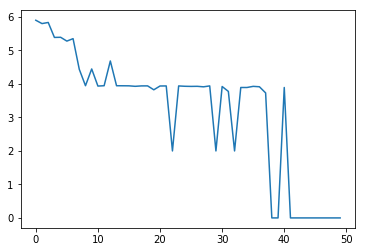

In [510]:
import matplotlib.pyplot as plt

plt.plot(range(0,50),a)

## we will choose 15 clusters as not a lot of improvement exists untill k is increased to 40

In [512]:
# set number of clusters
kclusters = 15

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_clusters)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([11, 11,  4, 11, 12, 11, 11, 11, 11,  7], dtype=int32)

In [514]:
# add the cluster list to toronto dataframe
toronto["Cluster"]=kmeans.labels_

In [515]:
toronto.head()

,PostalCode,Burough,Neighborhood,Latitude,Longitude,Cluster
0,M3A,North York,Parkwoods,43.753259,-79.329656,11
1,M4A,North York,Victoria Village,43.725882,-79.315572,11
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,4
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,11
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,12


In [543]:
# create map
map_clusters = folium.Map(location=[toronto["Latitude"][0], toronto["Longitude"][0]], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 2, 2*len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto['Latitude'], toronto['Longitude'], toronto['Neighborhood'], toronto['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.1).add_to(map_clusters)
       
map_clusters